In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

def build_dataset(data_path, name) -> None:
    targets = ['rnti_count', 'rb_down', 'rb_up', 'down', 'up']
    X_train = pd.read_csv(f'{data_path}/{name}.csv')
    X_test = pd.read_csv(f'{data_path}/{name}_test.csv')

    X_train.fillna(0, inplace=True)
    X_test.fillna(0, inplace=True)
    
    y_train = X_train[targets].values
    X_train = X_train.drop(columns=targets + ['time'])
   
    y_test = X_test[targets].values
    X_test = X_test.drop(columns=targets + ['time'])

    # feature_scaler = RobustScaler()
    # X_train = pd.DataFrame(feature_scaler.fit_transform(X_train))
    # X_test = pd.DataFrame(feature_scaler.transform(X_test))

    # target_scaler = RobustScaler()
    # y_train = target_scaler.fit_transform(y_train)
    # y_test = target_scaler.transform(y_test)

    df_y_train = pd.DataFrame(y_train, columns=targets)
    df_y_test = pd.DataFrame(y_test, columns=targets)
    for column in targets:
        X_train[column] = df_y_train[column]
        X_test[column] = df_y_test[column]

    X_train.to_csv(f'../data/5g_data_scaled/train_client_{name}.csv', index=False)
    X_test.to_csv(f'../data/5g_data_scaled/test_client_{name}.csv', index=False)

Real FL case

In [6]:
import pandas as pd
import numpy as np

base_path = '../data/5g_data'
train_elborn = pd.read_csv(f"{base_path}/train_client_ElBorn.csv")
train_lescorts = pd.read_csv(f"{base_path}/train_client_LesCorts.csv")
train_poblesec = pd.read_csv(f"{base_path}/train_client_PobleSec.csv")

test_elborn = pd.read_csv(f"{base_path}/test_client_ElBorn.csv")
test_lescorts = pd.read_csv(f"{base_path}/test_client_LesCorts.csv")
test_poblesec = pd.read_csv(f"{base_path}/test_client_PobleSec.csv")

In [7]:
import matplotlib.pyplot as plt

def plot_all_targets(dataset1, dataset2, dataset3, dataset4, dataset_name):
    feature = 'rnti_count'  # Single feature to plot

    plt.figure(figsize=(6, 3))  # Set figure size

    # Plot the same feature from all three datasets
    plt.plot(dataset1[feature], label='part 1', linewidth=2)
    plt.plot(dataset2[feature], label='part 2', linewidth=2)
    plt.plot(dataset3[feature], label='part 3', linewidth=2)
    plt.plot(dataset4[feature], label='part 4', linewidth=2)

    # Increase font size for title, legend, and labels
    # plt.title(f'{dataset_name}', fontsize=16)
    plt.xlabel('Instances', fontsize=16)
    plt.ylabel(feature, fontsize=16)
    # plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=4, fontsize=16, frameon=False)
    ax = plt.gca()  # Get the current axis
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_ylim(0, 40000)
    plt.tight_layout()
    plt.savefig('elborn_test_parts.pdf', dpi=600, bbox_inches='tight', pad_inches=0.1)
    plt.grid(False)  # Add grid for better visualization
    plt.show()
    


def plot_all_clients_side_by_side(datasets, dataset_names):
    """
    Plots multiple clients' data side by side in one figure.
    
    Args:
    - datasets: List of lists, where each inner list contains 4 partitions for a dataset.
    - dataset_names: List of dataset names corresponding to the clients.
    """
    feature = 'rnti_count'
    colors = ['blue', 'orange', 'green', 'red']
    num_clients = len(datasets)

    fig, axes = plt.subplots(nrows=1, ncols=num_clients, figsize=(18, 3), sharey=True)

    for i, (dataset, name) in enumerate(zip(datasets, dataset_names)):
        for j in range(4):  # Loop over 4 partitions
            axes[i].plot(dataset[j][feature], label=f'part {j+1}', linewidth=2)
        
        axes[i].set_title(name, fontsize=16)
        axes[i].set_xlabel("Instances", fontsize=12)
        if i == 0:
            axes[i].set_ylabel(feature, fontsize=12)  # Set y-label only for the first plot
        # axes[i].legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4, fontsize=12, frameon=False)
        
        # Remove top and right borders
        axes[i].spines['right'].set_visible(False)
        axes[i].spines['top'].set_visible(False)

    plt.tight_layout()
    plt.savefig('test_data_parts.pdf', dpi=600, bbox_inches='tight', pad_inches=0.1)
    plt.show()

/Users/milenaangelova/git-repo/FedClust/venv/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


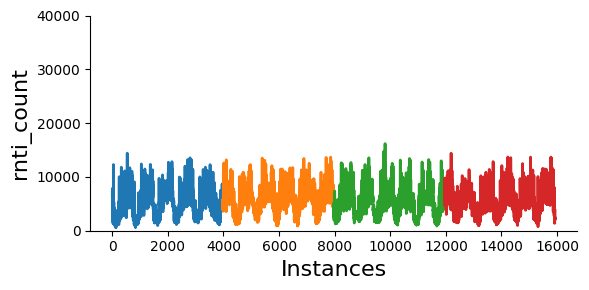

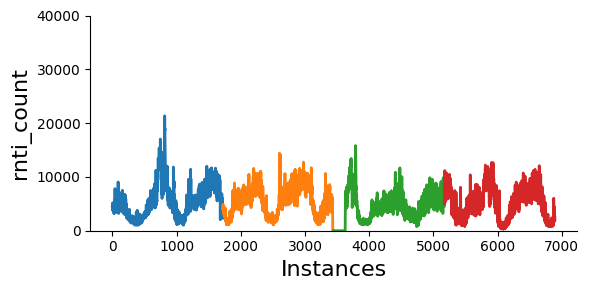

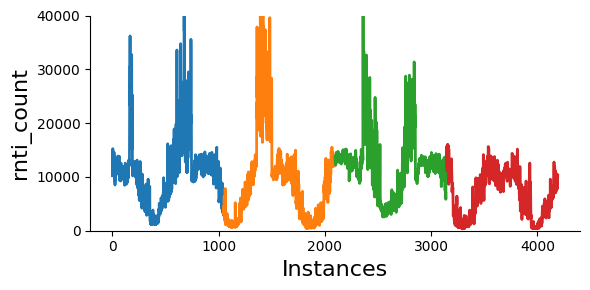

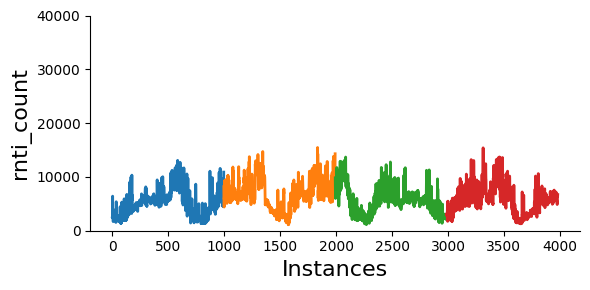

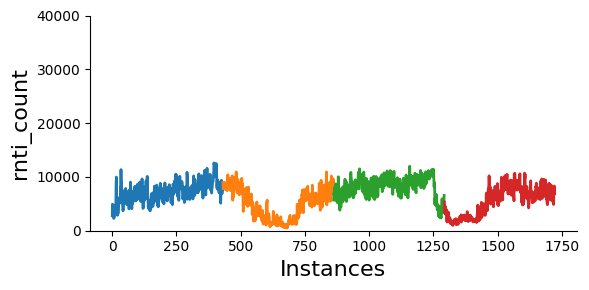

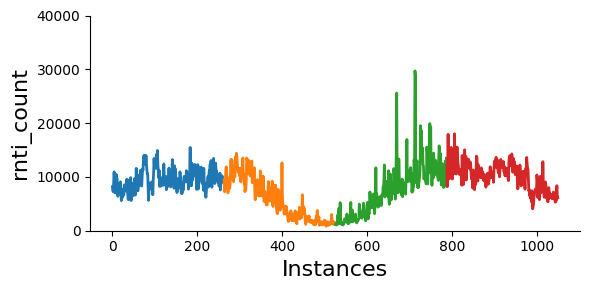

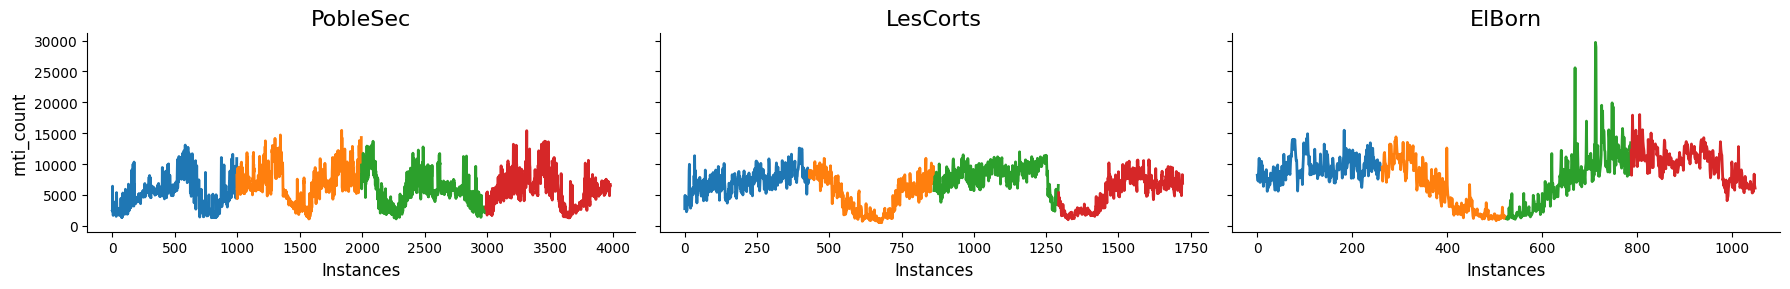

In [8]:
lescorts_client_train_list = np.array_split(train_lescorts, 4)
lescorts_client_test_list = np.array_split(test_lescorts, 4)

elborn_client_train_list = np.array_split(train_elborn, 4)
elborn_client_test_list = np.array_split(test_elborn, 4)

poblesec_client_train_list = np.array_split(train_poblesec, 4)
poblesec_client_test_list = np.array_split(test_poblesec, 4)

plot_all_targets(poblesec_client_train_list[0], poblesec_client_train_list[1], poblesec_client_train_list[2], poblesec_client_train_list[3], dataset_name='PobleSec train data')
plot_all_targets(lescorts_client_train_list[0], lescorts_client_train_list[1], lescorts_client_train_list[2], lescorts_client_train_list[3],  dataset_name='LesCorts train data')
plot_all_targets(elborn_client_train_list[0], elborn_client_train_list[1], elborn_client_train_list[2], elborn_client_train_list[3], dataset_name='ElBorn train data')



plot_all_targets(poblesec_client_test_list[0], poblesec_client_test_list[1], poblesec_client_test_list[2], poblesec_client_test_list[3], dataset_name='PobleSec test data')
plot_all_targets(lescorts_client_test_list[0], lescorts_client_test_list[1], lescorts_client_test_list[2], lescorts_client_test_list[3],  dataset_name='LesCorts test data')
plot_all_targets(elborn_client_test_list[0], elborn_client_test_list[1], elborn_client_test_list[2], elborn_client_test_list[3], dataset_name='ElBorn test data')

datasets_train = [[poblesec_client_train_list[0], poblesec_client_train_list[1], poblesec_client_train_list[2], poblesec_client_train_list[3]], 
            [lescorts_client_train_list[0], lescorts_client_train_list[1], lescorts_client_train_list[2], lescorts_client_train_list[3]], 
            [elborn_client_train_list[0], elborn_client_train_list[1], elborn_client_train_list[2], elborn_client_train_list[3]]]

dataset_names_train = ["PobleSec", "LesCorts", "ElBorn"]
dataset_names_test = ["PobleSec", "LesCorts", "ElBorn"]

datasets_test = [[poblesec_client_test_list[0], poblesec_client_test_list[1], poblesec_client_test_list[2], poblesec_client_test_list[3]], 
            [lescorts_client_test_list[0], lescorts_client_test_list[1], lescorts_client_test_list[2], lescorts_client_test_list[3]], 
            [elborn_client_test_list[0], elborn_client_test_list[1], elborn_client_test_list[2], elborn_client_test_list[3]]]

# plot_all_clients_side_by_side(datasets_train, dataset_names_train)
plot_all_clients_side_by_side(datasets_test, dataset_names_test)